##  Assignment - Policy Iteration

### Assignment Description

In this programming assignment, we will explore an agent in gridworld that uses policy iteration to estimate the best action in a state.

First, we import the required libraries.

#### Note: Please do not modify any pre-defined variables. Doing so can affect the autograder results.

In [ ]:
##importing modules 

!pip install --user --upgrade gym==0.20.0
import numpy as np
import pprint
from gridworld import GridworldEnv

pp = pprint.PrettyPrinter(indent=2)

Now we instantiate a gridworld environment from Sutton's Reinforcement Learning book chapter 4. 

You are an agent on an $m \times n$ grid, and your goal is to reach the terminal state at the top left or the bottom right corner.

For example, a 4x4 grid looks as follows:

        T  o  o  o
        o  x  o  o
        o  o  o  o
        o  o  o  T

x is your position, and Ts are the two terminal states.

You can take actions in each direction (UP=0, RIGHT=1, DOWN=2, LEFT=3).

You do not need to implement anything for it, but it will help you assess and take action through the grid. Note that

- `env.P` represents the transition probabilities of the environment.
- `env.P[s][a]` is a list of transition tuples (prob, next_state, reward, done).
- `env.nS` is a number of states in the environment, 4 x 4 by default
- `env.nA` is a number of actions in the environment, i.e. (UP=0, RIGHT=1, DOWN=2, LEFT=3).

In [ ]:
env = GridworldEnv()  ###initializing the environments

Now we create a helper function `action_estimation` to calculate the action value for all actions in a given state.

The arguments for the function are:
- `env`: Grid world environment
- `state`: The state to consider (int)
- `V`: The value to use as an estimator, vector of length `env.nS`
- `discount_factor`: Future discount factor

The function should return:
- A vector of length `env.nA` containing the expected value of each action.

> HINT: How can the Bellman Update equation be used here?

In [ ]:
##action estimation function

def action_estimation(env, state, V, discount_factor):
    A = np.zeros(env.nA)
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[state][a]:
            
            # START CODING HERE
        
            # your code here
            

            # END CODING HERE

    return A

Now we create a function `get_best_action` to find the best action and calculate the best action value.

The arguments for the function are:
- A vector of length `env.nA` containing the expected value of each action.

The function should return a tuple with two values:
- Best action `a`
- Action value for `a`

In [ ]:
def get_best_action(A):
    # START CODING HERE
        
    # your code here
    

    # END CODING HERE    

Now create a function to create a deterministic policy using the optimal value function.

The arguments for the function are:
- `env`: Grid world environment
- `V`: The value to use as an estimator, vector of length `env.nS`
- `discount_factor`: Future discount factor

The function should return a matrix `policy` of size `env.nS` x `env.nA`

> Hint: A deterministic `policy` always selects one action per state for all `env.nS` states.

> HINT: What should be the probability of best_action in the policy?

In [ ]:
def policy_estimation(env, V, discount_factor):
    policy = np.zeros([env.nS, env.nA])
    
    
    while True:
        
        policy_stable = True
        
        for s in range(env.nS):
            # find the best action for this state
            A = action_estimation(env, s, V, discount_factor)
            
            chosen_a = np.argmax(policy[s])
            
            best_action, best_action_value = get_best_action(A)
            
            if best_action != chosen_a:
                policy_stable = False

            # START CODING HERE

            # your code here
            
            
            # END CODING HERE  

#         print(policy_stable)      
        if policy_stable:
            return policy

In [ ]:
def policy_iteration(env, p = policy_estimation, theta=0.0001, discount_factor=1, max_iterations=1000):
    
    V = np.zeros(env.nS)
    
    p = policy_estimation(env, V, discount_factor)
    found_optimal = False

    for iteration in range(max_iterations):
        delta = 0
        # Update each state...
        for s in range(env.nS):
            # possible actions
            best_action_value = 0
            for a, action_prob in enumerate(p[s]):

                for  prob, next_state, reward, done in env.P[s][a]:

                    best_action_value += action_prob * prob * (reward + discount_factor * V[next_state])

            # Calculate delta change
            delta = max(delta, np.abs(best_action_value - V[s]))
#                 print(delta)

            V[s] = best_action_value        
        # Check if we can stop 
        if delta < theta:
            found_optimal = True
            break

        p = policy_estimation(env, V, discount_factor)
#             print(p)
        
    return p, V

In [ ]:
policy, v = policy_iteration(env)

print("Policy Probability Distribution:")
print(policy)
print("")

print("Reshaped Grid Policy (0=up, 1=right, 2=down, 3=left):")
print(np.reshape(np.argmax(policy, axis=1), env.shape))
print("")

print("Value Function:")
print(v)
print("")

print("Reshaped Grid Value Function:")
print(v.reshape(env.shape))
print("")

You expected answer should be the following:

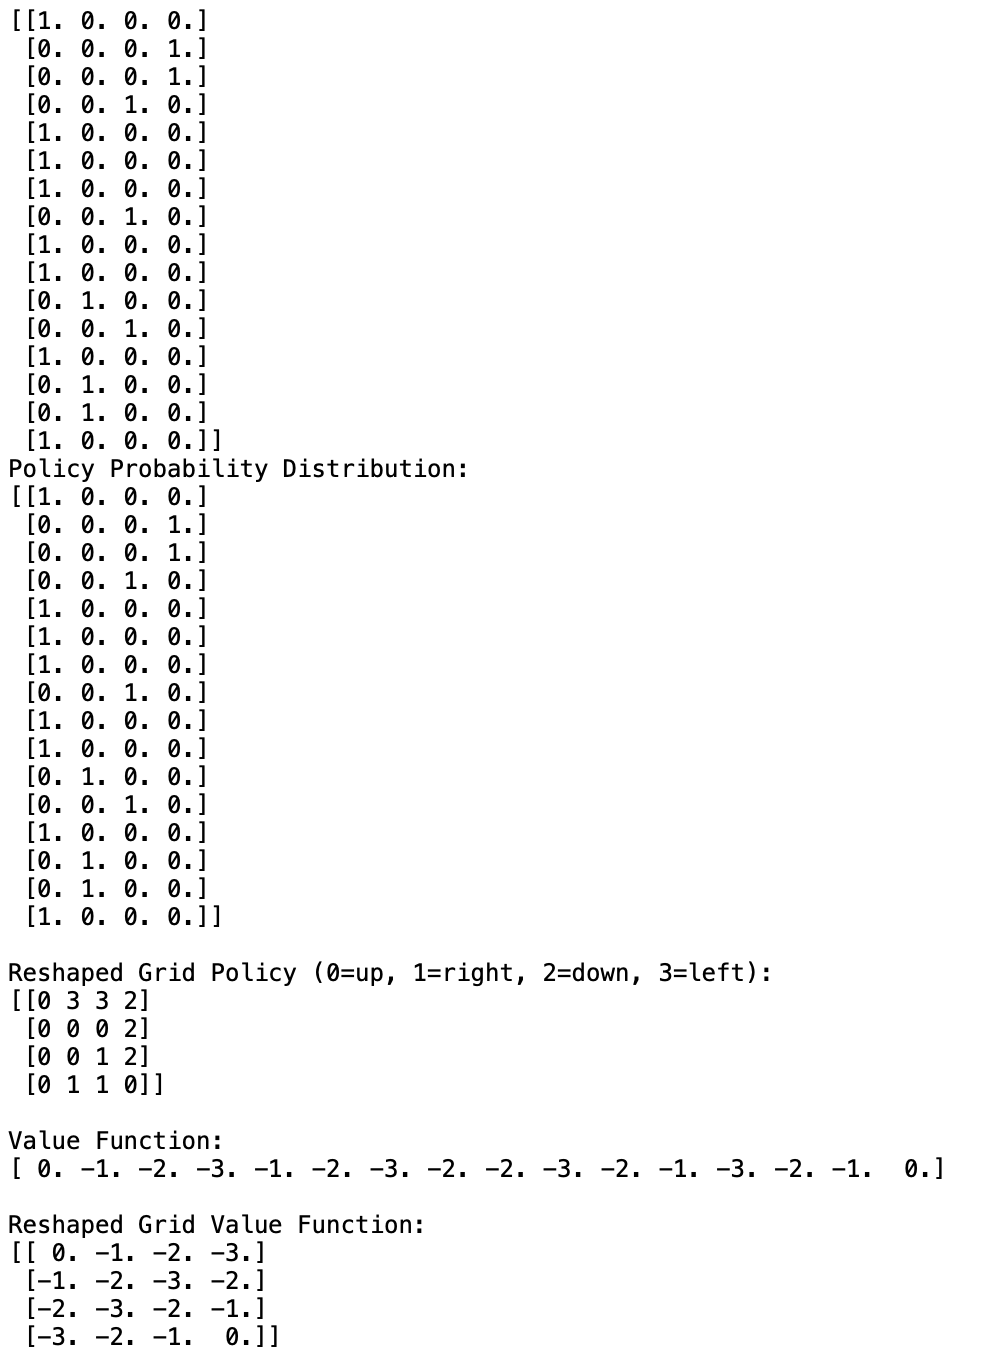

If you have implemented the aforementioned functions correctly, the following test should pass without issue.

In [ ]:
# Test the value function
expected_v = np.array([ 0, -1, -2, -3, -1, -2, -3, -2, -2, -3, -2, -1, -3, -2, -1,  0])
assert np.allclose(v, expected_v, rtol=1e-4) 